<a href="https://colab.research.google.com/github/anahimaciel/Networks-in-cities/blob/main/Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import numpy as np
import pandas as pd
from scipy.spatial import ConvexHull

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geopy.distance

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import os

deixar pra filtrar os usuários após calcular as casas

ver se todas as pessoas q recebem ligação também ligam

fazer slides

# Prep

In [ ]:
def circumcircle_radius(polygon_points):
    hull = ConvexHull(polygon_points)
    vertices = polygon_points[hull.vertices]
    centroid = np.mean(vertices, axis=0)

    # Calculate maximum distance from centroid to hull vertices
    max_distance = 0
    centroid_tuple = (centroid[0], centroid[1])
    for vertex in vertices:
        vertex_tuple = (vertex[0], vertex[1])
        distance = geopy.distance.geodesic(centroid_tuple, vertex_tuple).kilometers
        max_distance = max(max_distance, distance)

    return max_distance

In [19]:
cities=[]

total_users=[]
sig_users=[]
res_users=[]

calls=[]
calls_sig_users=[]
calls_res_users=[]
calls_res_users_unique=[]
calls_res_users_nonzero=[]

radius=[]
city_size=[]
antennas=[]

for i in os.listdir("/content/drive/MyDrive/Networks in cities/Dados"):
  if(i=="Fortaleza" or i==".ipynb_checkpoints"):
    continue

  print(i)

  cities.append(i)

  file=open("/content/drive/MyDrive/Networks in cities/Dados/"+i+"/demo.txt",'r+')
  total_users.append(int(file.readline().split()[1])/1000)
  sig_users.append(int(file.readline().split()[2])/1000)
  calls.append(int(file.readline().split()[1]))
  calls_sig_users.append(int(file.readline().split()[4]))

  file=open("/content/drive/MyDrive/Networks in cities/Dados/"+i+"/demo2.txt",'r+')
  res_users.append(int(file.readline().split()[3])/1000)
  calls_res_users.append(int(file.readline().split()[5]))
  calls_res_users_unique.append(int(file.readline().split()[8]))
  calls_res_users_nonzero.append(int(file.readline().split()[12]))

  df=pd.read_csv("/content/drive/MyDrive/Networks in cities/Dados/" +i+ "/results.txt")
  radius.append(float(df._get_value(len(df)-1,' total_distance')))

  antenna_df=pd.read_csv("/content/drive/MyDrive/Networks in cities/Dados/" +i+ "/antennas_"+i+".txt", sep=";")
  antennas.append(len(antenna_df))

  #Calculating radius of city
  points = antenna_df[['LAT', 'LONG']].to_numpy()
  radius_city = circumcircle_radius(points)
  city_size.append(radius_city)

Caucaia
Franca
Jundiaí
Piracicaba
Suzano
Taubaté
Mogi das Cruzes
Montes Claros
Ponta Grossa
Rio Branco


# Plots

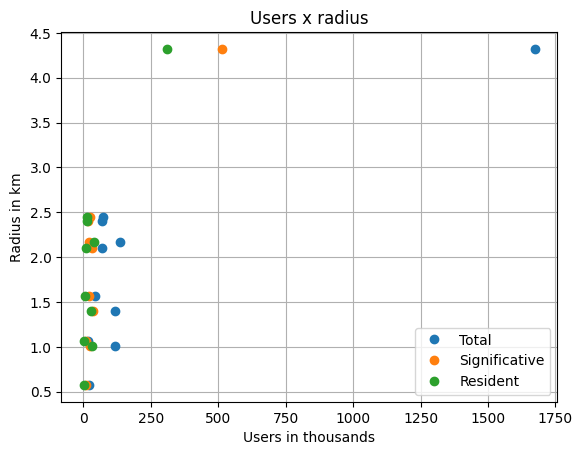

In [ ]:
# Plot
plt.plot(total_users, radius, 'o', label='Total')
plt.plot(sig_users, radius, 'o', label='Significative')
plt.plot(res_users, radius, 'o', label='Resident')

#labels for points
#for i in range(len(radius)):
#    plt.text(total_users[i], radius[i], cities[i], ha='right')
#    plt.text(sig_users[i], radius[i], cities[i], ha='right')
#    plt.text(res_users[i], radius[i], cities[i], ha='right')

# Customize plot
plt.xlabel('Users in thousands')
plt.ylabel('Radius in km')
plt.title('Users x radius')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

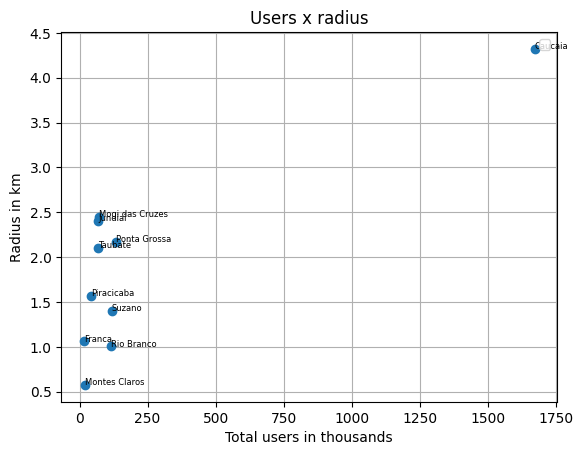

In [ ]:
# Plot
plt.plot(total_users, radius, 'o')

#labels for points
for i in range(len(radius)):
    plt.text(total_users[i], radius[i], cities[i], ha='left',fontsize=6)

# Customize plot
plt.xlabel('Total users in thousands')
plt.ylabel('Radius in km')
plt.title('Users x radius')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

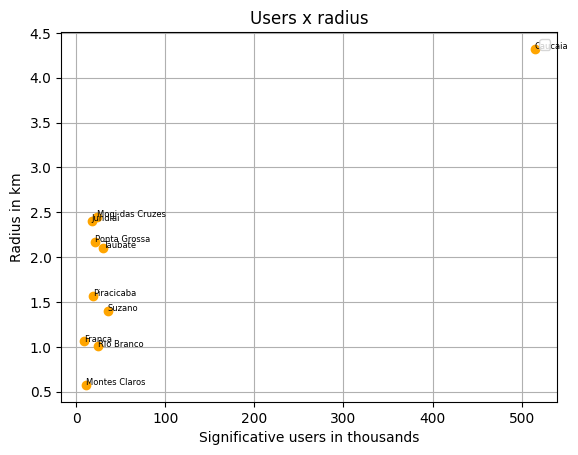

In [ ]:
# Plot
plt.plot(sig_users, radius, 'o',color="orange")

#labels for points
for i in range(len(radius)):
    plt.text(sig_users[i], radius[i], cities[i], ha='left',fontsize=6)

# Customize plot
plt.xlabel('Significative users in thousands')
plt.ylabel('Radius in km')
plt.title('Users x radius')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

In [ ]:
# Plot
plt.plot(res_users, radius, 'o', color="green")

#labels for points
for i in range(len(radius)):
    plt.text(res_users[i], radius[i], cities[i], ha='left',fontsize=6)

# Customize plot
plt.xlabel('Users with residence in thousands')
plt.ylabel('Radius in km')
plt.title('Users x radius')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

NameError: name 'res_users' is not defined

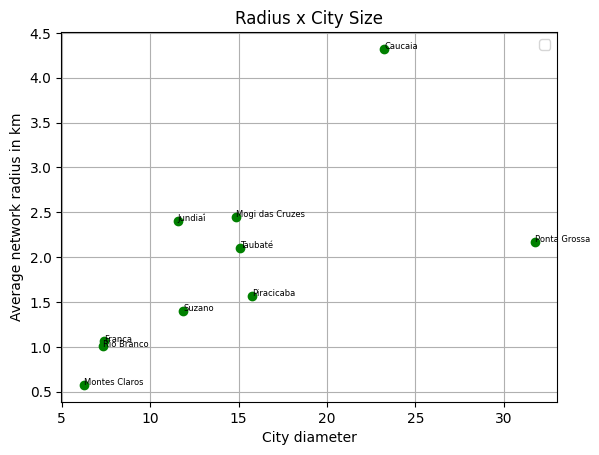

In [ ]:
# Plot
plt.plot(city_size, radius, 'o', color="green")

#labels for points
for i in range(len(radius)):
    plt.text(city_size[i], radius[i], cities[i], ha='left',fontsize=6)

# Customize plot
plt.xlabel('City diameter')
plt.ylabel('Average network radius in km')
plt.title('Radius x City Size')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

# Distributions


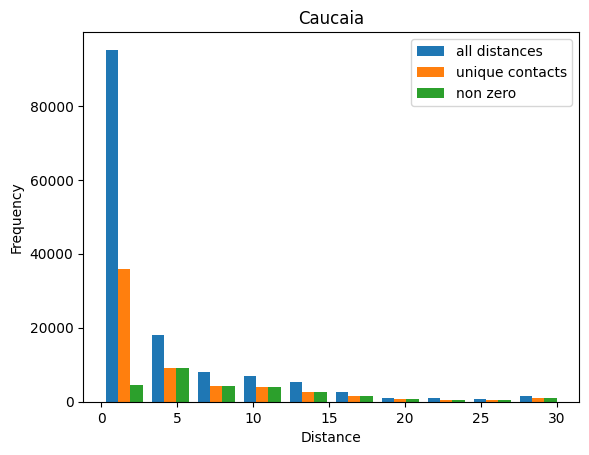

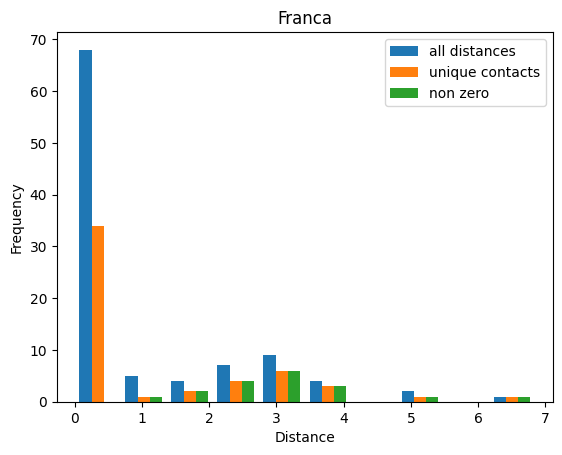

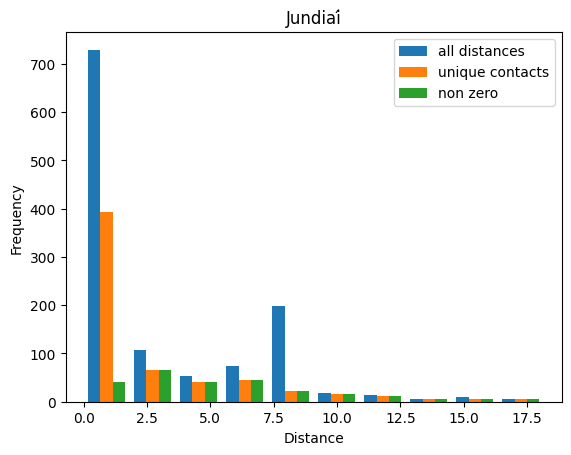

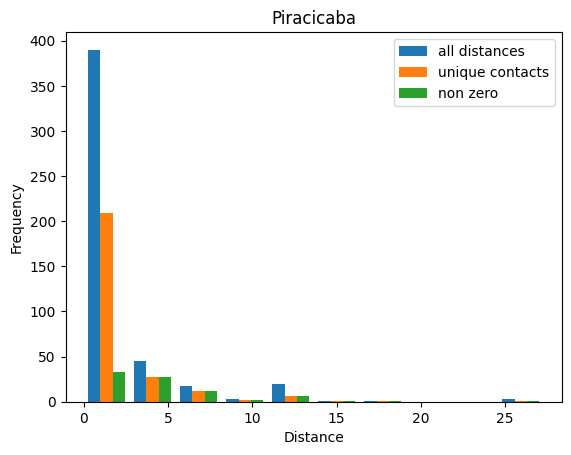

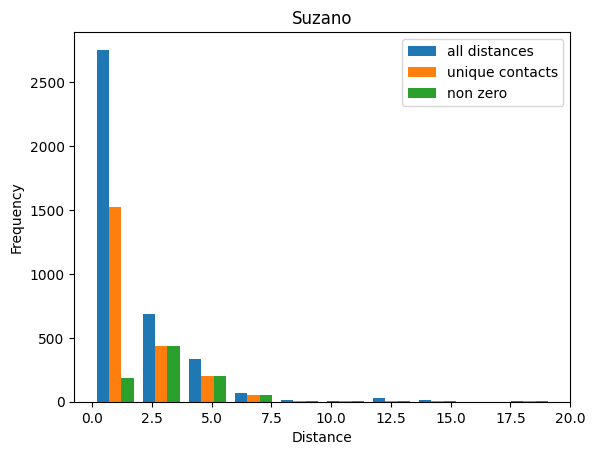

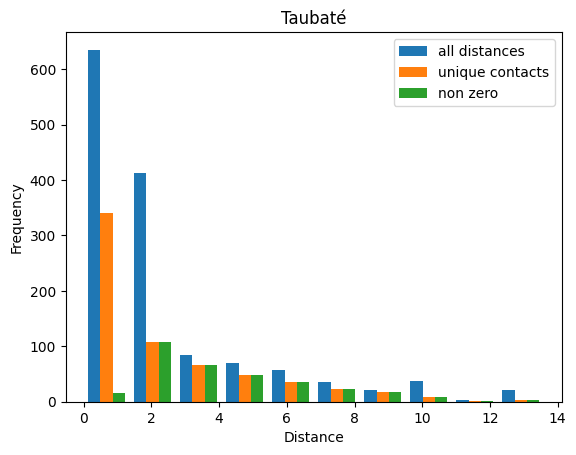

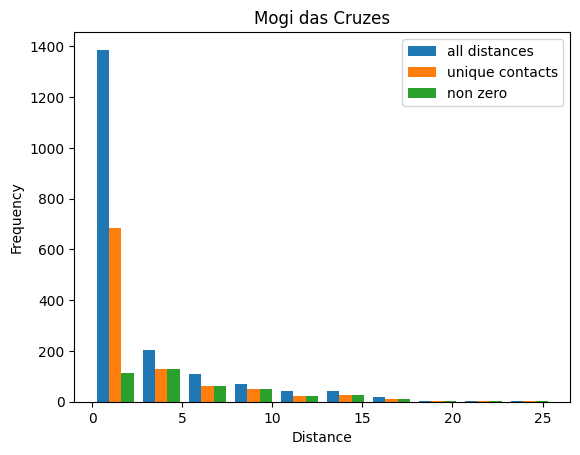

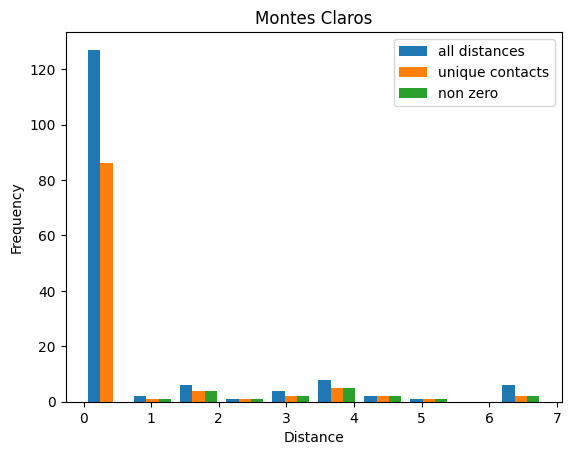

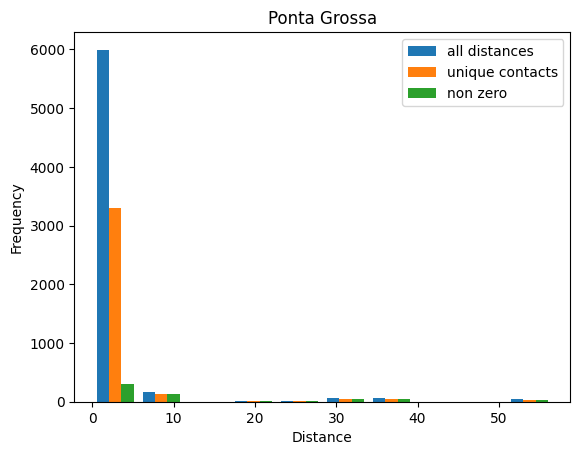

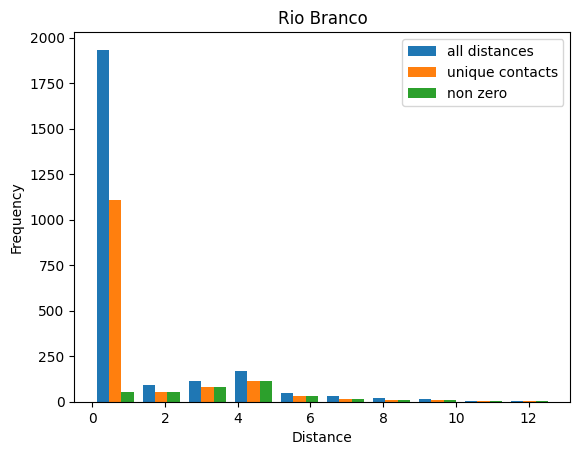

In [ ]:
for i in os.listdir("/content/drive/MyDrive/Networks in cities/Dados"):
  if(i=="Fortaleza" or i==".ipynb_checkpoints"):
    continue

  filt_df=pd.read_csv("/content/drive/MyDrive/Networks in cities/Dados/" +i+ "/filtered_cdr_2.txt")

  x=filt_df['distance']
  y=filt_df.groupby(['user_from','user_to']).first()['distance']
  z=y[y!=0]

  plt.hist([x,y,z], label= ['all distances','unique contacts','non zero'])

  plt.xlabel('Distance')
  plt.ylabel('Frequency')
  plt.title(f'{i}')

  plt.legend()

  plt.savefig("/content/drive/MyDrive/Networks in cities/Dados/" +i+ "/distribution.png")
  plt.show()

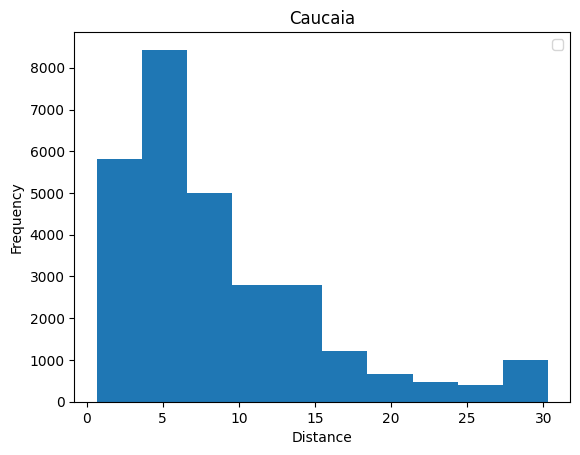

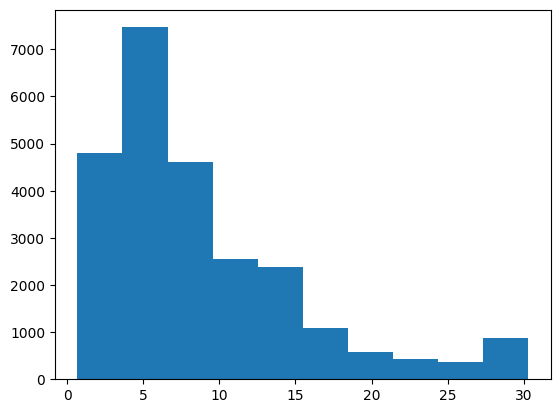

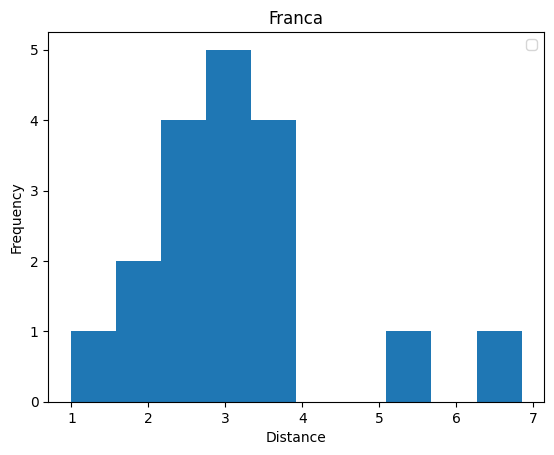

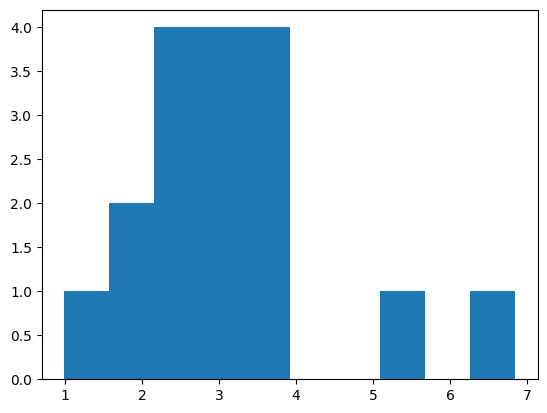

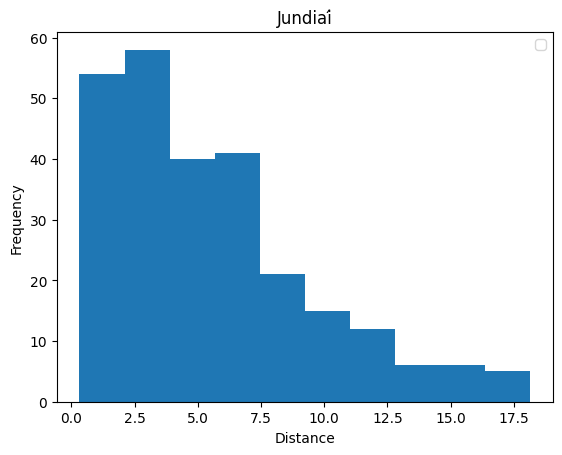

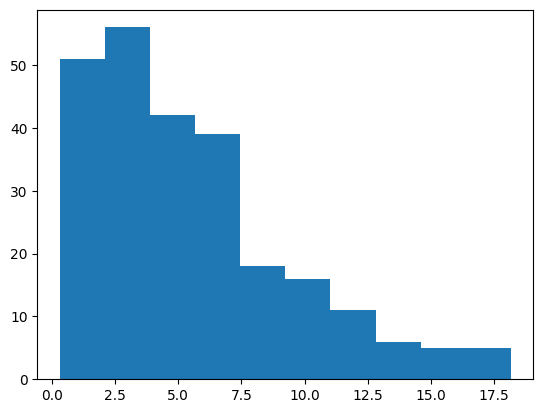

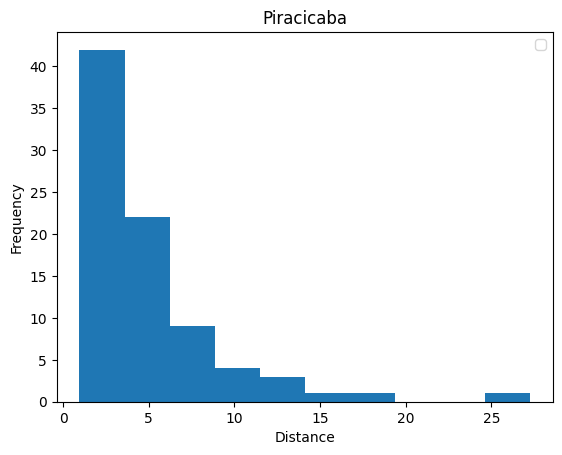

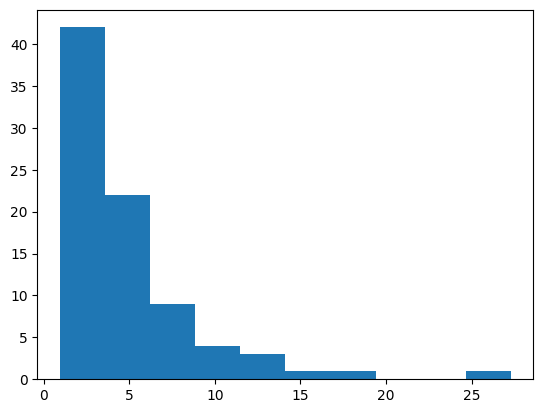

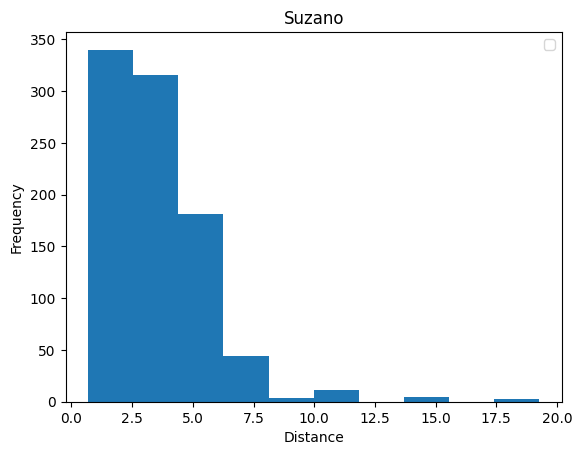

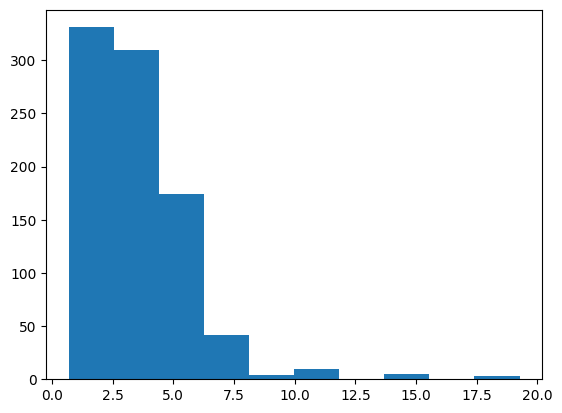

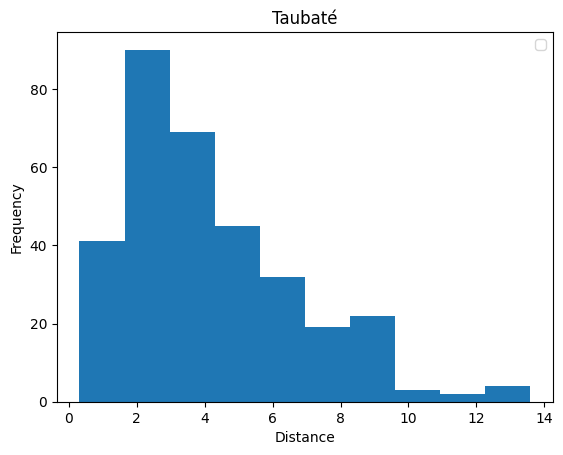

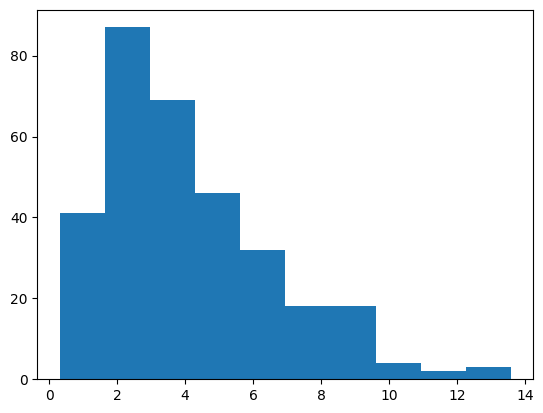

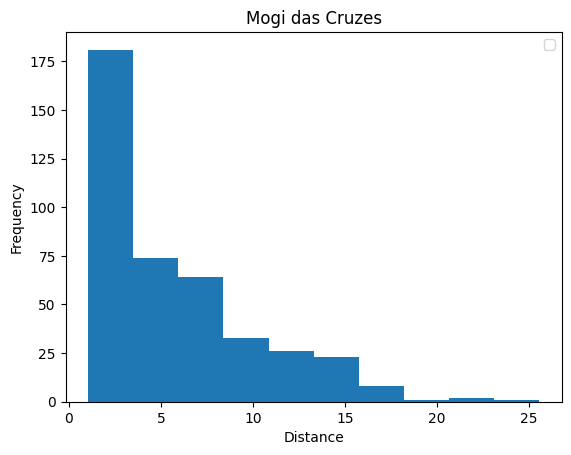

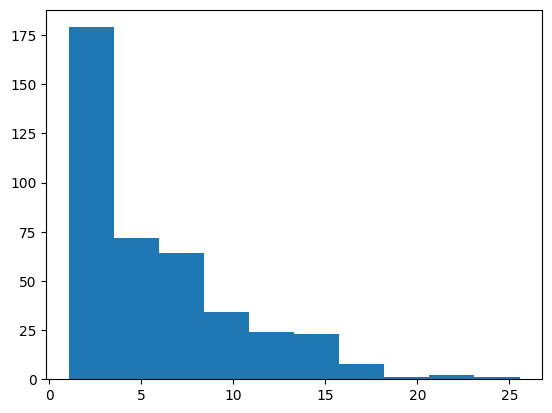

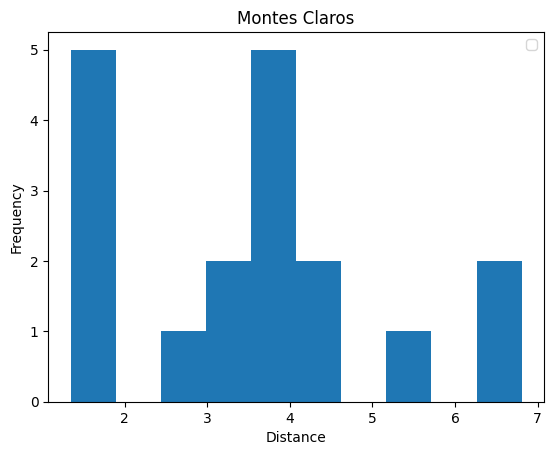

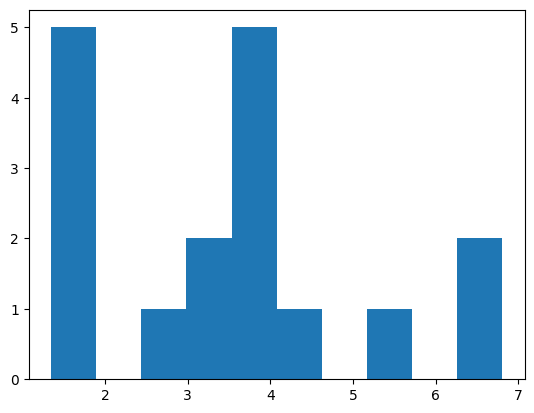

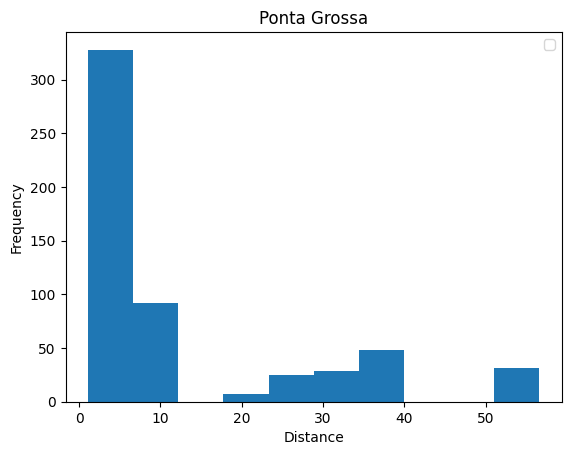

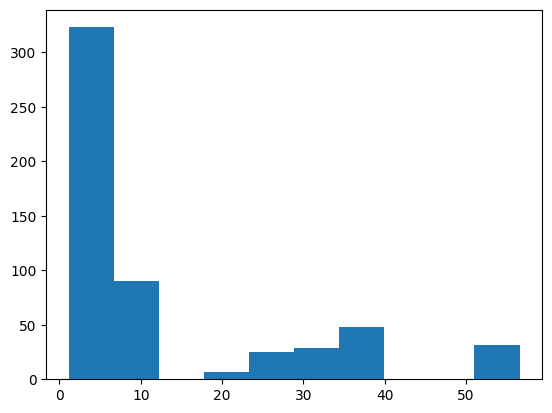

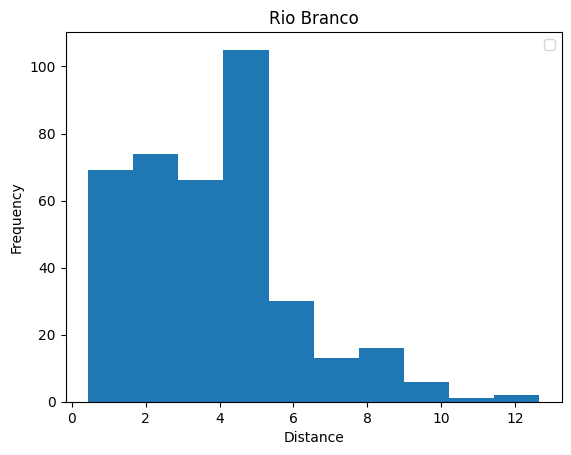

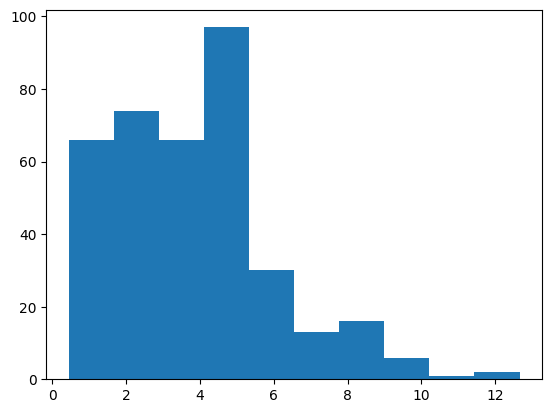

In [ ]:
for i in os.listdir("/content/drive/MyDrive/Networks in cities/Dados"):
  if(i=="Fortaleza" or i==".ipynb_checkpoints"):
    continue

  filt_df=pd.read_csv("/content/drive/MyDrive/Networks in cities/Dados/" +i+ "/filtered_cdr_2.txt")

  y=filt_df.groupby(['user_from','user_to']).first()
  y=y[y['distance']!=0]

  plt.hist(y['distance'])

  plt.xlabel('Distance')
  plt.ylabel('Frequency')
  plt.title(f'{i}')

  plt.legend()

  plt.show()

  radii=y.groupby("user_from").agg({'distance':['sum','size']})
  radii.columns=['total_distance','n_calls']
  radii['avg_radius']=radii['total_distance']/radii['n_calls']
  plt.hist(radii['avg_radius'])
  plt.show()

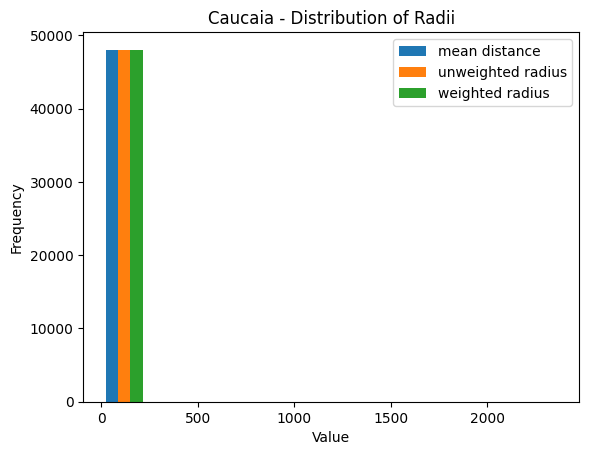

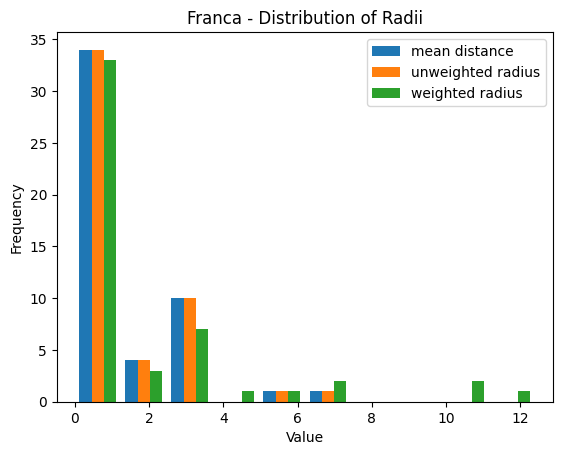

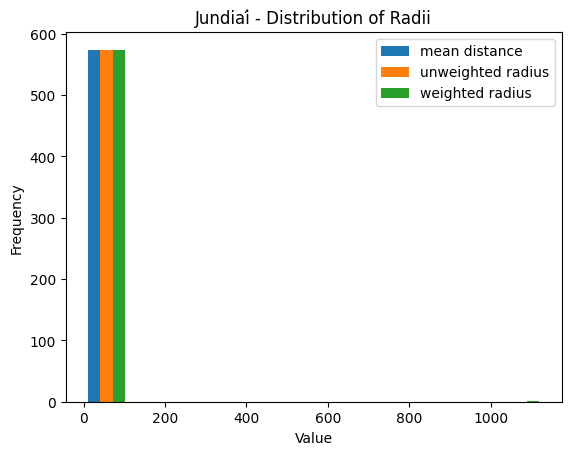

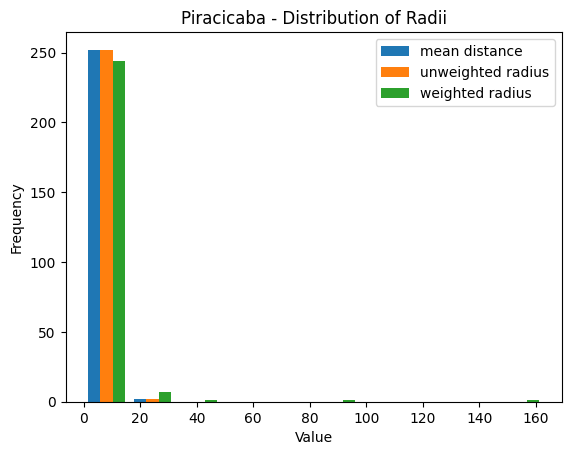

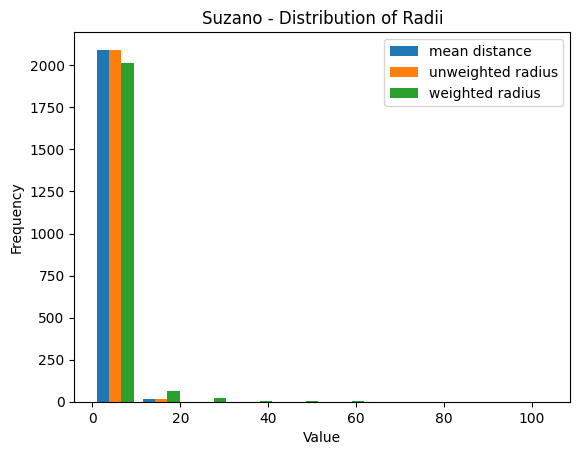

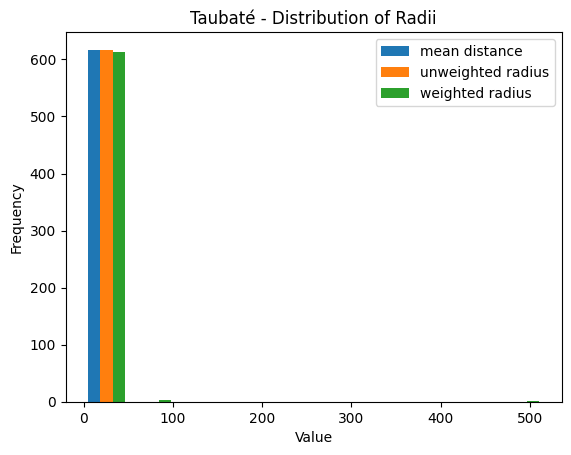

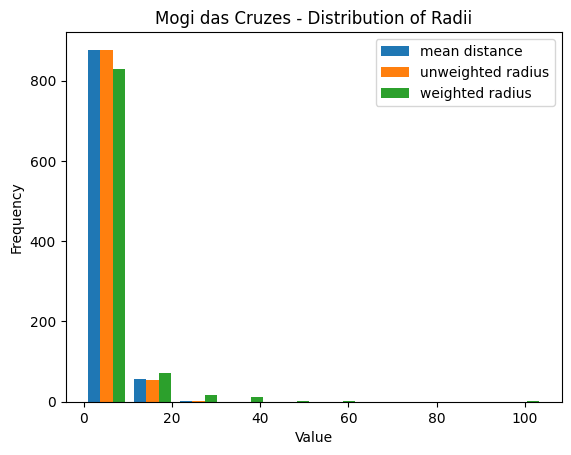

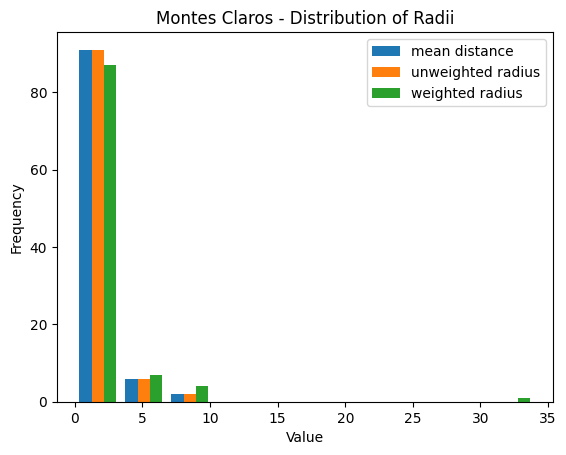

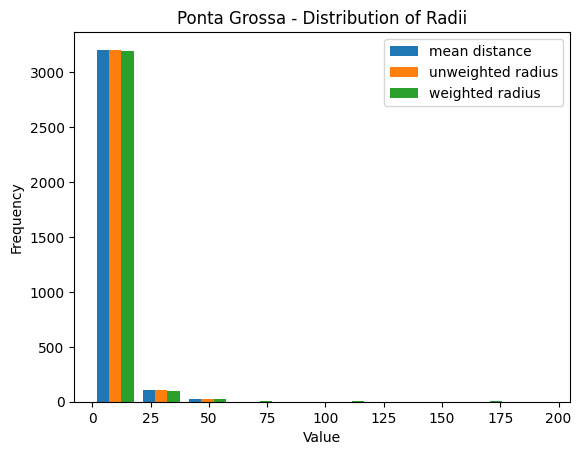

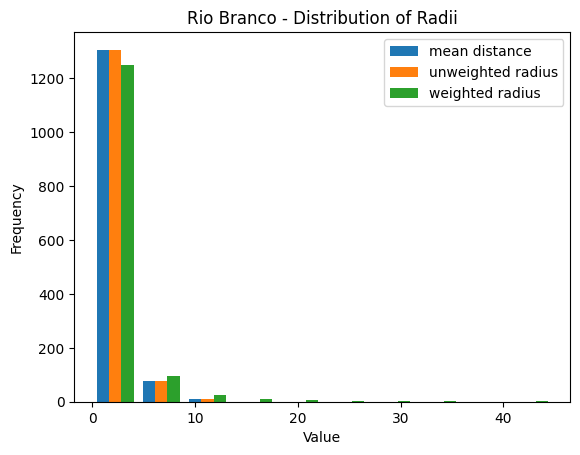

In [ ]:
for i in os.listdir("/content/drive/MyDrive/Networks in cities/Dados"):
  if(i=="Fortaleza" or i==".ipynb_checkpoints"):
    continue
  radius_df=pd.read_csv("/content/drive/MyDrive/Networks in cities/Dados/" +i+ "/radii.txt")

  x=radius_df['avg_dist_by_calls']
  y=radius_df['avg_radius_without_alpha']
  z=radius_df['avg_radius']

  plt.hist([x,y,z], label= ['mean distance','unweighted radius','weighted radius'])

  plt.xlabel('Value')
  plt.ylabel('Frequency')
  plt.title(f'{i} - Distribution of Radii')
  plt.legend()

  plt.savefig("/content/drive/MyDrive/Networks in cities/Dados/" +i+ "/distribution_avgs.png")
  plt.show()

# Tabela

In [21]:
#creating table with data about cities
table_data={'Cities':cities,'Users':total_users,'Sig Users': sig_users,
            'Res Users': res_users, 'Calls': calls, 'Sig Calls': calls_sig_users,
            'Res Calls': calls_res_users, 'Unique Calls':calls_res_users_unique,
            'Nonzero calls': calls_res_users_nonzero, 'Antennas': antennas,
            'City Radius':city_size, 'Network Radius':radius}

table=pd.DataFrame(table_data)
table.set_index('Cities')

table


,Cities,Users,Sig Users,Res Users,Calls,Sig Calls,Res Calls,Unique Calls,Nonzero calls,Antennas,City Radius,Network Radius
0,Caucaia,1673.445,514.651,310.002,45792564,12918830,140392,48037,25148,116,23.242766,4.321585
1,Franca,15.603,8.623,1.551,1020053,279300,100,50,17,75,7.408550,1.059737
2,Jundiaí,69.316,17.492,14.081,1674929,576618,1216,574,249,153,11.554448,2.401544
3,Piracicaba,43.018,19.378,6.157,1953682,405397,480,254,83,152,15.747620,1.564077
4,Suzano,117.897,35.694,26.452,2501272,553567,3911,2110,879,63,11.860862,1.401822
5,Taubaté,69.491,30.373,10.536,2638040,426981,1377,617,320,128,15.063704,2.100154
6,Mogi das Cruzes,73.055,23.115,14.536,1954380,399252,1873,935,408,98,14.867288,2.453097
7,Montes Claros,20.287,11.175,2.084,1705355,644221,157,99,17,85,6.248522,0.575358
8,Ponta Grossa,135.295,21.664,38.143,1446297,402018,6357,3343,553,90,31.759919,2.166270
9,Rio Branco,116.947,24.971,31.242,1560219,380062,2425,1392,371,123,7.356316,1.005558
